# Assignment 4

In [1]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time as tm

sns.set(style = 'ticks', palette = "pastel")

#Read the data
movies = pd.read_csv('movies_cleaned.csv')
movies.drop(columns = 'Unnamed: 0', inplace = True)

## Part 1

### Use the dataset *movies_cleaned.csv*. We wish to find the **95% confidence interval** of **Profit** for the movies of genre **'Action'**. We will use a method known as **Bootstrapping** to do that. 

Bootstrapping is a non-parametric method for obtaining confidence interval. The method is as follows. *(12 points overall)* 

(a) Find the profit for each of the Action movies. Suppose there are N such movies. You will have a Profit column with N values.

(b) Randomly sample N values with replacement from the Profit column 

(c) Find the mean of the N values obtained in (b) 

(d) Repeat steps (b) and (c) 1000 times 

(e) The 95% Confidence interval is the range between the 2.5% and 97.5% percentile values of the 1000 means obtained in (c) 

Use the following two methods to answer this question: 

**(1)	Without using NumPy, compute the:** \
(a) 95% Confidence interval of profit for ‘Action’ movies, and 
(b) Time taken to execute the code for obtaining the confidence interval

*(4 points for code, 2 points for answers)*

In [2]:
movies['Profit'] = movies['Worldwide Gross'] - movies['Production Budget']
action = movies[(movies['Action'] == 1)]

In [3]:
#Bootstrapping
mean_vals = pd.Series(1000)
action_rows = action.shape[0]

start_time = tm.time()
for i in range(1000):
        mean_vals[i] = action['Profit'].sample(n = action_rows, replace = True).mean()
end_time = tm.time()  

mean_vals.quantile([0.025, 0.975])

print("Time taken:", str(end_time-start_time))
print("95% Confidence Interval:[", mean_vals.quantile(0.025), ",", mean_vals.quantile(0.975),"]")

Time taken: 0.949965238571167
95% Confidence Interval:[ 133830504.40085226 , 182999176.58342803 ]


**(2)	Using NumPy, and without using loops, compute the:** \
(a) 95% Confidence interval of profit for ‘Action’ movies, and 
(b) Time taken to execute the code for obtaining the confidence interval

*(4 points for code, 2 points for answers)*

Note that Profit = Worldwide gross – Production budget.

In [4]:
start_time = tm.time()
rep = np.random.choice(action.Profit, replace = True,  size = (action.shape[0],1000))
means = pd.DataFrame(rep).mean(axis=0)
end_time = tm.time()  
means.quantile([0.025, 0.975])
print("Time taken:", str(end_time-start_time))
print("95% Confidence Interval:[", means.quantile(0.025), ",", means.quantile(0.975),"]")

Time taken: 0.015005350112915039
95% Confidence Interval:[ 131287005.76145834 , 182018107.20994318 ]


## Part 2

Download the datasets ‘percent-bachelors-degrees-women-usa.csv’ and 'percent-bachelors-degrees-women-usa-complete.csv' from Canvas.  *(16 points overall)*

In [5]:
#Import data
per = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
complete = pd.read_csv('percent-bachelors-degrees-women-usa-complete.csv')

#### a.	Report the number of missing values for each column in ‘percent-bachelors-degrees-women-usa.csv’. Which three columns have the most missing values? *(1 point for code, 1 point for answer)*

In [6]:
per.apply(lambda x: x.isnull().sum())

Year                             0
Agriculture                      0
Architecture                     0
Art and Performance              0
Biology                          6
Business                         0
Communications and Journalism    0
Computer Science                 4
Education                        0
Engineering                      5
English                          0
Foreign Languages                1
Health Professions               0
Math and Statistics              0
Physical Sciences                1
Psychology                       1
Public Administration            1
Social Sciences and History      1
dtype: int64

The three columns with the most missing values are the biology, engineering, and computer science, in that order, too.

#### b. For which years in the 'Year' column are the values of the 'Biology' column missing? *(1 point for code, 1 point for answer)*

In [7]:
#Finding the indexes of the rows where the biology column is missing
per.index[per.Biology.isnull()]
ind = per.index[per.Biology.isnull()]

In [8]:
#Locating those columns per indexes specifcally
per.loc[(per.index >= 28) & (per.index <= 33)]

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
28,1998,41.912403,37.598545,59.1,NaN,49.258515,60.0,27.0,75.486160,17.8,67.255448,70.1,82.1,48.3,39.7,75.1,81.3,50.5
29,1999,42.887202,38.631529,59.2,NaN,49.810208,61.2,28.1,75.838162,18.6,67.820221,70.9,83.5,47.8,40.2,76.5,81.1,51.2
30,2000,45.057766,40.023585,59.2,NaN,49.803616,61.9,27.7,76.692143,18.4,68.365995,70.9,83.5,48.2,41.0,NaN,81.1,51.8
31,2001,45.866015,40.690282,59.4,NaN,50.275145,63.0,27.6,77.375229,19.0,68.578520,71.2,85.1,47.0,42.2,77.5,80.9,51.7
32,2002,47.134658,41.132951,60.9,NaN,50.552335,63.7,27.0,78.644244,18.7,68.829960,70.5,85.8,45.7,41.1,77.7,81.3,51.5
33,2003,47.935187,42.758543,61.1,NaN,50.345598,64.6,25.1,78.544948,NaN,68.894487,70.6,86.5,46.0,41.7,77.8,81.5,50.9


The values for the 'Biology' column is missing for all years 1998 through 2003.

#### c. Make a scatter plot showing the values of the 'Biology' column on the vertical axis and the 'Year' on the horizontal axis. Make a trendline representing the points on the scatter plot *(3 points for code)*
Hint: (i) Refer to Lec3_dataViz notes for the trendline, (ii) While making the trendline, do not consider the observations with missing values in the 'Biology' column.

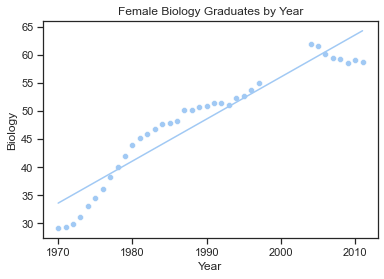

In [9]:
#Creating the scatterplot in seaborn
sns.scatterplot(data = per, x = 'Year', y = 'Biology').set_title("Female Biology Graduates by Year")

#Defining df without missing values in Biology column
x = per.drop(index = ind)['Year']
y = per.drop(index = ind)['Biology']

# Plotting a trendline
z = np.polyfit(x,y,1)
p = np.poly1d(z) 
plt.plot(x, p(x)) 


#### d. Create a copy of the missing data, and call it "imputed_data". Using the trendline, impute the missing values for the 'Biology' column. Fill in the missing values of the Biology column with the imputed values, in the "imputed_data". *(2 points for code)*

Hint: (i) Refer to Lec3_dataViz notes for the trendline (ii) The function p(x) will provide you an estimate of the value of the 'Biology' column for Year 'x', based on the trendline.

In [10]:
#Creating the imputed_data df
x1 = per.Year
imputed_data = per.loc[per.Biology.isnull()]

for i in [1998, 1999, 2000, 2001, 2002, 2003]:
        imputed_data.loc[imputed_data.Year == i, "Biology"] = p(i)
        
imputed_data

C:\Users\nvsim\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\nvsim\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\nvsim\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
28,1998,41.912403,37.598545,59.1,54.569478,49.258515,60.0,27.0,75.486160,17.8,67.255448,70.1,82.1,48.3,39.7,75.1,81.3,50.5
29,1999,42.887202,38.631529,59.2,55.318550,49.810208,61.2,28.1,75.838162,18.6,67.820221,70.9,83.5,47.8,40.2,76.5,81.1,51.2
30,2000,45.057766,40.023585,59.2,56.067622,49.803616,61.9,27.7,76.692143,18.4,68.365995,70.9,83.5,48.2,41.0,NaN,81.1,51.8
31,2001,45.866015,40.690282,59.4,56.816694,50.275145,63.0,27.6,77.375229,19.0,68.578520,71.2,85.1,47.0,42.2,77.5,80.9,51.7
32,2002,47.134658,41.132951,60.9,57.565766,50.552335,63.7,27.0,78.644244,18.7,68.829960,70.5,85.8,45.7,41.1,77.7,81.3,51.5
33,2003,47.935187,42.758543,61.1,58.314838,50.345598,64.6,25.1,78.544948,NaN,68.894487,70.6,86.5,46.0,41.7,77.8,81.5,50.9


####  e. Make a scatter plot as follows:
(i) Plot the values of the 'Biology' column on the vertical axis and 'Year' on the horizontal axis *(1 point for code)* \
(ii) Color the points for the non-missing values of the 'Biology' column as 'lightgrey' *(1 point for code)* \
(iii) Plot the trendline (as in part (c) above) *(1 point for code)* \
(iv) Plot the imputed values of the Biology column. Color the points as 'red' *(1 point for code)* \
(v) Suppose the actual values for the 'Biology' column for the years 1998-2003 are 56.35, 58.23, 59.39, 60.71, 61.89 and 62.17 respectively. Plot these values, and color the points as 'green' *(1 point for code)*

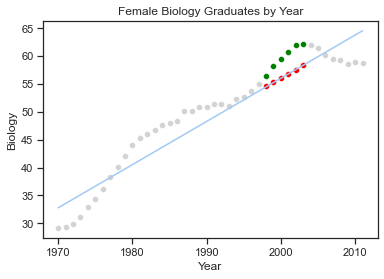

In [11]:
#Creating the scatterplot in seaborn
sns.scatterplot(data = per, x = 'Year', y = 'Biology', color  = 'lightgrey').set_title("Female Biology Graduates by Year")
sns.scatterplot(data = imputed_data, x = 'Year', y = 'Biology', color  = 'red')
sns.scatterplot(data = imputed_data, x = 'Year', y = [56.35, 58.23, 59.39, 60.71, 61.89, 62.17], color = 'green')
#Defining df without missing values in Biology column
fill =  per.dropna()
x = fill['Year']
y = fill['Biology']

# Plotting a trendline
z = np.polyfit(x,y,1) # Degree 1 is a straight line, 2 is a degree of curve // there is no np.poly2d or np.poly3d functions
p = np.poly1d(z) # Defines a function to compute the position of z, the line
plt.plot(x, p(x)) # p(x) is the function p that we just defined in relation to the x variable (linear regression)

#### f. Compute the RMSE (Root mean squared error) and the MAE (Mean absolute error) for the imputed values. *(2 points for code)*

In [12]:
#RMSE
x = [56.35, 58.23, 59.39, 60.71, 61.89, 62.17]
y = imputed_data.loc[ind, 'Biology']

rmse = np.sqrt(((x-y).pow(2)).mean())
print("RMSE=",rmse)

#MAE
mae = np.absolute(y-x).mean()
print("MAE=",mae)

RMSE= 3.449736454612834
MAE= 3.347841735756635


## Part 3

Find and load the data set "weather_stations.csv" on Canvas. The data is drawn from the city of Chicago's automated sensors at beach weather stations. Each row is a distinct record. Some of the data has been altered to reflect the fact that weather sensor data can sometimes be unpredictable or unreliable.  

If a question asks you to alter the data set, please use the updated data set for the following questions. *(24 points overall)*

In [13]:
#Importing data
weather = pd.read_csv('weather_stations.csv')
weather.drop(columns = "Column1", inplace = True)

#### 1. In this data set the string "-" represents a NaN value. Print all the column names that have at least one "-" as one of their values *(2 pts for code)*

In [14]:
weather["Wet Bulb Temperature"].isin(["-"])

for i in weather.columns:
    if weather[i].isin(['-']).sum() > 0 :
        print(i)

Station Name
Wet Bulb Temperature
Rain Intensity
Total Rain
Precipitation Type
Heading


#### 2. Replace all "-" values with np.nan. Drop all rows where "Station Name" is null and report how many rows were dropped. *(1 pt for code, 1 pt for answer)*

In [15]:
weather.replace(to_replace = "-", value = np.nan, inplace = True)

stationnull = weather.index[weather["Station Name"].isnull()]

weather.drop(index = stationnull, inplace = True)

stationnull.shape

(42,)

42 rows were dropped because there were 42 indexes of rows that contained a null value in the "Station Name" column.

#### 3. Wind direction shouldn't be above 360. For records with wind direction values above 360, replace the wind direction values with the median wind direction corresponding to the record's weather station. Plot a histogram of wind direction values. *(3 points for code incl. visualization)*

In [16]:
oak = weather.loc[weather["Station Name"] == "Oak Street Weather Station"]
oak["Wind Direction"].median()
weather.loc[weather["Wind Direction"] > 360, "Wind Direction"] =oak["Wind Direction"].median()

<AxesSubplot:xlabel='Wind Direction', ylabel='Count'>

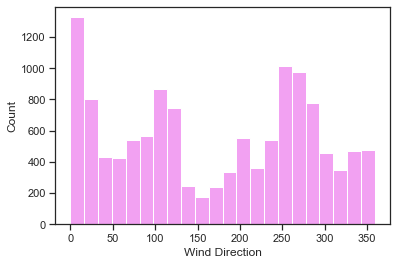

In [17]:
sns.histplot(x = weather["Wind Direction"], color = "violet")

#### 4. Humidity values should not be negative. Calculate the mean humidity using the original data, then drop all rows with sub-zero humidity records. Recalculate and report mean humidity. *(2 points for code)*

In [18]:
oldhumidity = weather["Humidity"].mean()

subzero = weather.loc[weather["Humidity"] < 0].index

weather.drop(index = subzero, inplace = True)      

In [19]:
newhumidity = weather["Humidity"].mean()
print("The old humidity mean is: ", oldhumidity)
print("The new humidity mean is:", newhumidity)

The old humidity mean is:  60.2251085669167
The new humidity mean is: 66.9007983558612


#### 5. Clearly the mean wind speed during a given hour ("Wind Speed" column) shouldn't exceed that hour's maximum wind speed. Where this discrepancy occurs, consider the mean wind speed an outlier and cap wind speed at its hourly maximum value (i.e. if maximum wind speed is 4.0, and the corresponding mean wind speed is 4.2, cap the mean wind speed by setting it to 4.0). Report the new overall mean wind speed at each weather station. *(2 points for code)*

In [20]:
weather.loc[weather["Wind Speed"] > weather["Maximum Wind Speed"], "Wind Speed"] = weather["Maximum Wind Speed"]
speed = weather["Wind Speed"].groupby(weather["Station Name"]).mean()
print("The new overall wind speed means for the different weather stations are as follows:", speed)

The new overall wind speed means for the different weather stations are as follows: Station Name
63rd Street Weather Station    3.253087
Foster Weather Station         2.735726
Oak Street Weather Station     1.964124
Name: Wind Speed, dtype: float64


#### 6. Are there any outliers based on Barometric Pressure? Use the [interquartile range rule](https://en.wikipedia.org/wiki/Interquartile_range#Outliers) to find and report how many outliers exist. *(2 points for code, 1 point for answer)*

In [21]:
q1 = weather["Barometric Pressure"].quantile(0.25 )
q3 = weather["Barometric Pressure"].quantile(0.75)
iqr = q3 - q1

weather.loc[(weather["Barometric Pressure"] >= q3+ iqr * 1.5) | (weather["Barometric Pressure"] <= q1 - iqr * 1.5) ].shape[0]

219

There are 219 observations that are considered outliers based on the Barometric Pressure column.

#### 7. We'll take a more conservative approach to finding outliers in terms of air temperature. Identify records where air temperature falls more one standard deviation from its mean value. How many such outliers are there? *(2 points for code, 1 pt for answer)*

In [22]:
std = weather["Air Temperature"].std()
air_mean = weather["Air Temperature"].mean()

air = weather.loc[(weather["Air Temperature"] < air_mean - std) | (weather["Air Temperature"] > air_mean + std)]

air.shape[0]

weather

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
0,Oak Street Weather Station,3/24/20 10:00,3.30,2,80,0,0.0,0.00,0,102,2.5,2.9,998.7,329,358,11.9
1,Oak Street Weather Station,3/24/20 11:00,3.60,2.4,81,0,0.0,0.00,0,111,2.6,3.6,998.7,582,0,12.0
2,Oak Street Weather Station,3/24/20 13:00,3.80,2.3,78,0,0.0,0.00,0,109,2.8,3.1,998.4,545,359,12.0
3,Oak Street Weather Station,3/24/20 14:00,3.90,2.3,76,0,0.0,0.00,0,91,1.7,2.1,997.3,552,359,12.0
4,Oak Street Weather Station,3/24/20 15:00,4.50,2.6,73,0,0.0,0.00,0,94,1.2,1.6,996.9,356,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12702,Foster Weather Station,12/5/20 18:00,2.89,NaN,59,NaN,0.0,NaN,NaN,0,0.0,0.0,998.0,2,NaN,15.2
12703,Oak Street Weather Station,12/5/20 18:00,3.80,1.4,66,0,0.0,74.70,0,33,3.0,4.0,999.1,2,357,12.0
12704,63rd Street Weather Station,12/5/20 19:00,3.40,1,65,0,0.0,28.80,0,77,5.0,5.8,997.8,4,350,11.9
12705,Foster Weather Station,12/5/20 19:00,2.78,NaN,58,NaN,0.0,NaN,NaN,0,0.0,0.0,997.3,4,NaN,14.8


There are 5002 outliers in the weather df based on the Air Temperature column.

#### 8. We're interested in classifying solar radiation, given in Watts per square meter. Define any value at or below 8 as "Low Solar Radiation," any value above 8 and up to 200 as "Moderate Solar Radiation," and any value above 200 as "High Solar Radiation." Use binning to create a new column classifying each record's solar radiation. What percentage of records are in each bin? *(2 points for code, 1 point for answer)*

In [23]:
radiation = pd.cut(weather['Solar Radiation'],[weather['Solar Radiation'].min(),8, 200, weather['Solar Radiation'].max()], retbins = False, labels = ['Low Solar Radiation', 'Moderate Solar Radiation', 'High Solar Radiation'], include_lowest = True)

weather["Radiation Level"] = radiation

pd.value_counts(weather['Radiation Level'], normalize = True) * 100

Low Solar Radiation         50.043475
High Solar Radiation        26.124417
Moderate Solar Radiation    23.832108
Name: Radiation Level, dtype: float64

The Low Solar Radiation bin had  50.043475%, the Moderate Solar Radiation bin had 23.832108%, and the High Solar Radiation bin had 26.124417% of the records.

#### 9. Using the "Measurement Timestamp" column, create new columns based on month, day of month, year, and time. *(2 points for code)*

In [24]:
weather["Month"] = pd.DatetimeIndex(weather["Measurement Timestamp"]).month
weather["Day"] = pd.DatetimeIndex(weather["Measurement Timestamp"]).day
weather["Year"] = pd.DatetimeIndex(weather["Measurement Timestamp"]).year
weather["Time"] = pd.DatetimeIndex(weather["Measurement Timestamp"]).hour

weather.head(1)

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,...,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Radiation Level,Month,Day,Year,Time
0,Oak Street Weather Station,3/24/20 10:00,3.3,2,80,0,0.0,0.00,0,102,...,2.9,998.7,329,358,11.9,High Solar Radiation,3,24,2020,10


#### 10. Suppose we're interested in comparing beach weather during different seasons. Let's call March/April/May "Spring," June/July/August "Summer," September/October/November "Fall," and December "Winter." Create dummy variables for the four seasons. *(2 points for code)*

In [25]:
seasons = pd.cut(weather['Month'],[3,5,8,11,12], labels = ['Spring', 'Summer', 'Fall', 'Winter'], include_lowest = True)
weather['Seasons'] = seasons

In [26]:
pd.value_counts(weather['Seasons'], normalize = True)

Fall      0.466366
Summer    0.327958
Spring    0.178405
Winter    0.027271
Name: Seasons, dtype: float64

In [27]:
dummy_seasons = pd.get_dummies(weather['Seasons'])

In [28]:
weather = weather.merge(dummy_seasons, left_index = True, right_index = True)
weather

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,...,Radiation Level,Month,Day,Year,Time,Seasons,Spring,Summer,Fall,Winter
0,Oak Street Weather Station,3/24/20 10:00,3.30,2,80,0,0.0,0.00,0,102,...,High Solar Radiation,3,24,2020,10,Spring,1,0,0,0
1,Oak Street Weather Station,3/24/20 11:00,3.60,2.4,81,0,0.0,0.00,0,111,...,High Solar Radiation,3,24,2020,11,Spring,1,0,0,0
2,Oak Street Weather Station,3/24/20 13:00,3.80,2.3,78,0,0.0,0.00,0,109,...,High Solar Radiation,3,24,2020,13,Spring,1,0,0,0
3,Oak Street Weather Station,3/24/20 14:00,3.90,2.3,76,0,0.0,0.00,0,91,...,High Solar Radiation,3,24,2020,14,Spring,1,0,0,0
4,Oak Street Weather Station,3/24/20 15:00,4.50,2.6,73,0,0.0,0.00,0,94,...,High Solar Radiation,3,24,2020,15,Spring,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12702,Foster Weather Station,12/5/20 18:00,2.89,NaN,59,NaN,0.0,NaN,NaN,0,...,Low Solar Radiation,12,5,2020,18,Winter,0,0,0,1
12703,Oak Street Weather Station,12/5/20 18:00,3.80,1.4,66,0,0.0,74.70,0,33,...,Low Solar Radiation,12,5,2020,18,Winter,0,0,0,1
12704,63rd Street Weather Station,12/5/20 19:00,3.40,1,65,0,0.0,28.80,0,77,...,Low Solar Radiation,12,5,2020,19,Winter,0,0,0,1
12705,Foster Weather Station,12/5/20 19:00,2.78,NaN,58,NaN,0.0,NaN,NaN,0,...,Low Solar Radiation,12,5,2020,19,Winter,0,0,0,1
